In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_excel("빚추가마지막.xlsx")
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0


In [4]:
df.loc[(df['income']>0)&(df['debt']>0),:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5414 non-null   int64  
 1   gen              5414 non-null   object 
 2   age              5414 non-null   int64  
 3   religion         5414 non-null   object 
 4   edu              5414 non-null   object 
 5   sm_year          383 non-null    float64
 6   sm_state         5414 non-null   object 
 7   sm_day           1048 non-null   float64
 8   dr_mean_year     5414 non-null   object 
 9   dr_6cup          2955 non-null   object 
 10  dr_hurt          2955 non-null   object 
 11  dr_worry         2955 non-null   object 
 12  preg_experience  5414 non-null   object 
 13  health_state     5414 non-null   int64  
 14  disabled         5414 non-null   object 
 15  work_state       5414 non-null   object 
 16  work_code        3801 non-null   float64
 17  region           5

In [5]:
df= df.loc[(df['income']>0)&(df['debt']>0),:]

<Axes: xlabel='debt', ylabel='income'>

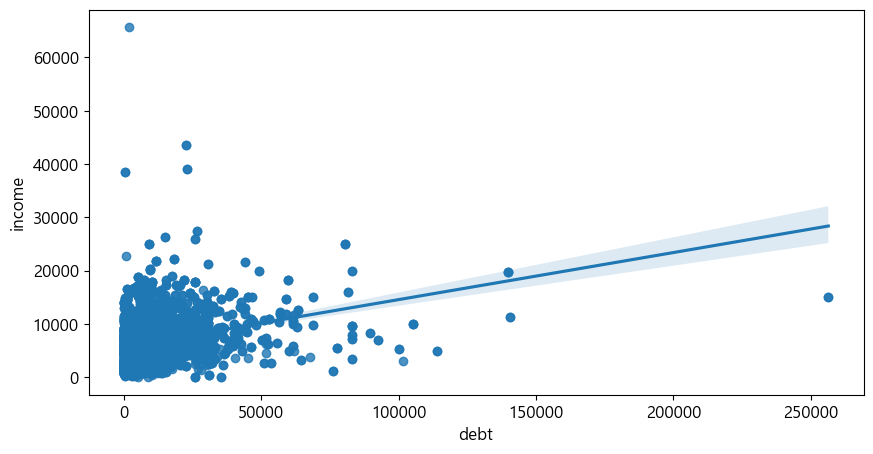

In [6]:
sns.regplot(data=df,x='debt',y='income')

<Axes: xlabel='debt', ylabel='y_total'>

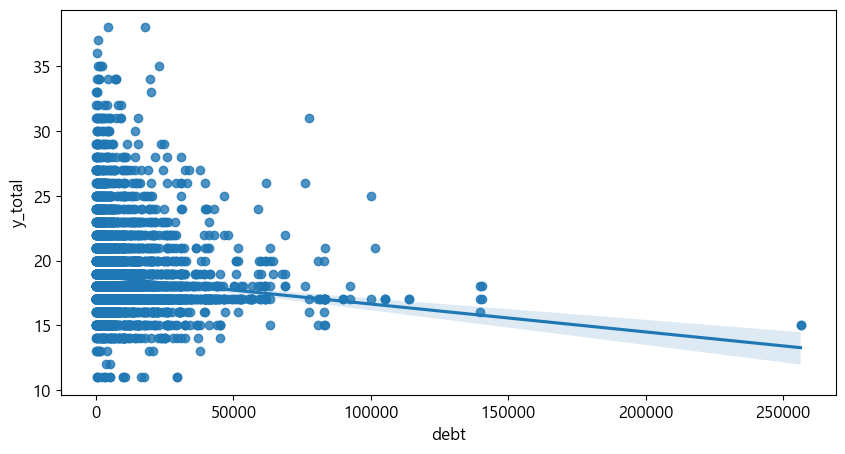

In [7]:
sns.regplot(data=df,x='debt',y='y_total')

In [8]:
corr  = df[['debt','income']].corr()
corr

,debt,income
debt,1.000000,0.300693
income,0.300693,1.000000


In [9]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,60세 이상
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,60세 이상
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,2290.8,21,1020.0,0,50~59세
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,2290.8,17,1020.0,0,30~39세
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,5958.0,20,12921.0,0,40~49세


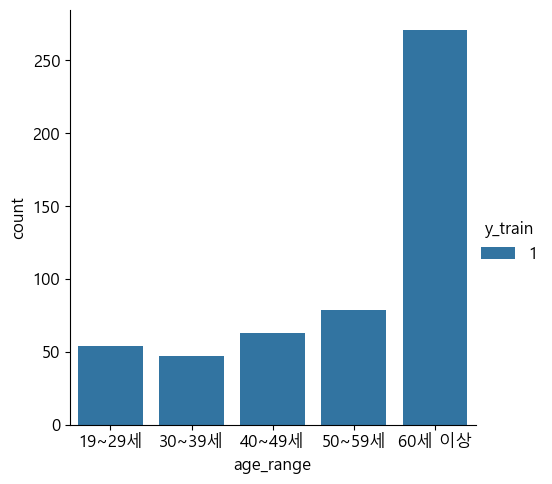

In [10]:
sns.catplot(data=df.loc[df['y_train']==1],x='age_range',kind='count',hue='y_train')

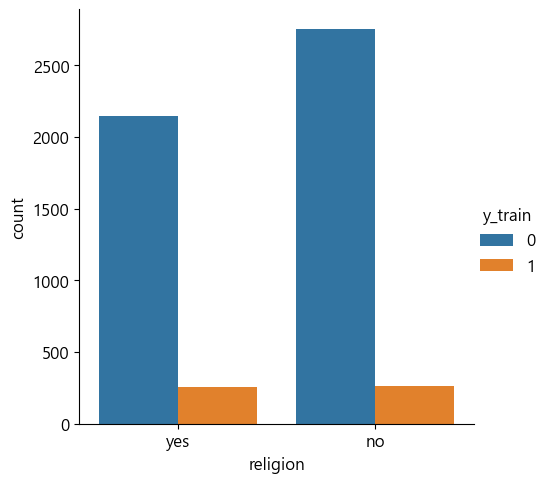

In [11]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

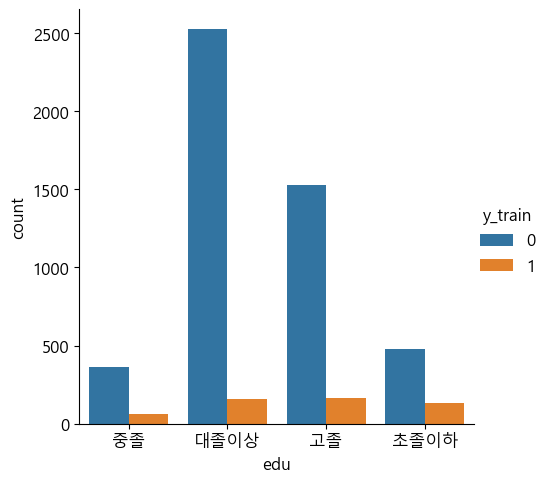

In [12]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')
plt.show()
plt.close()

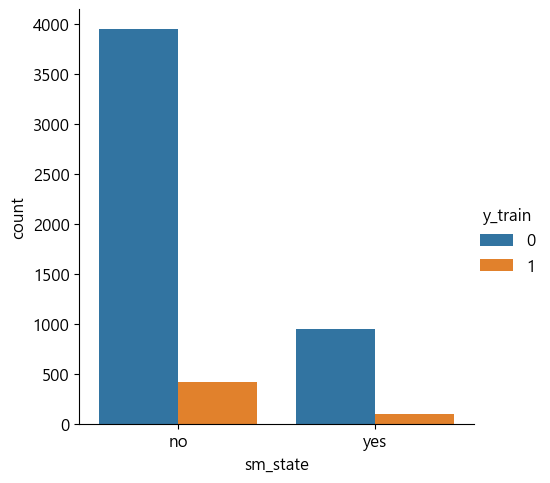

In [13]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [14]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =1048 ,
                            random_state = 2020)
                            


In [15]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()

sm_state
yes    1048
no     1048
Name: count, dtype: int64

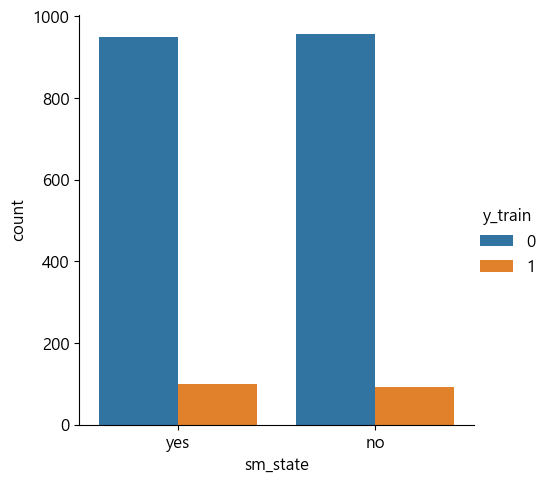

In [16]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

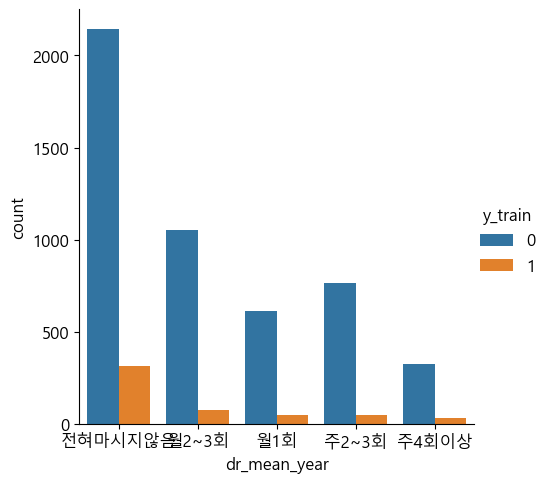

In [17]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [18]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

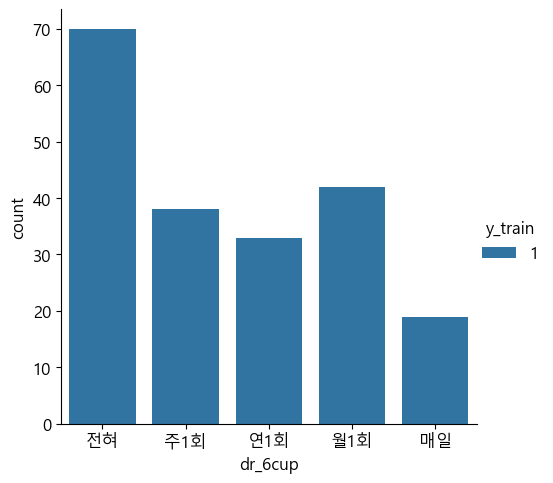

In [19]:
sns.catplot(data=over_dr.loc[over_dr['y_train']==1],x='dr_6cup',kind='count',hue='y_train')

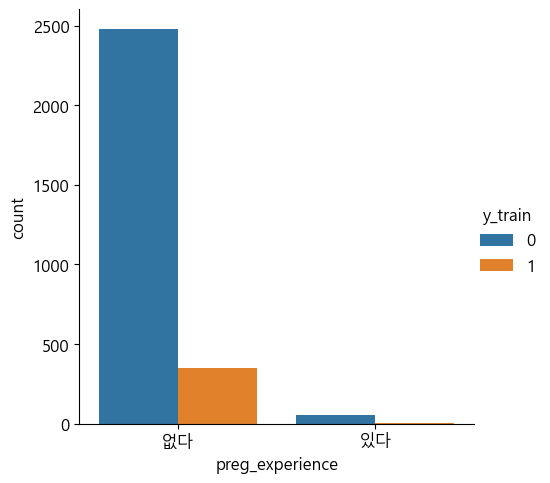

In [20]:
woman = df.loc[df['preg_experience']!='남성']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [21]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =57 ,
                            random_state = 2020)

In [22]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
있다    57
없다    57
Name: count, dtype: int64

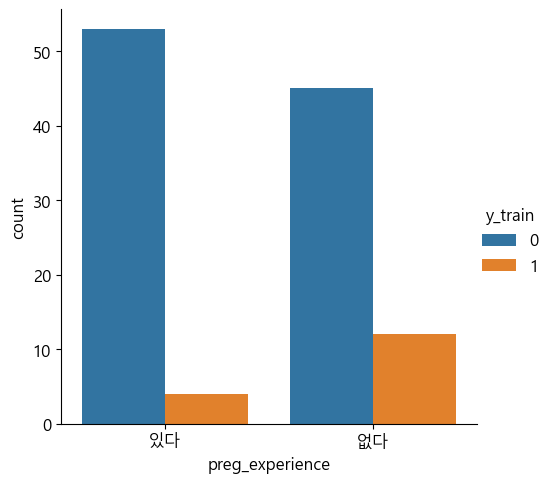

In [23]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

,health_state,y_total
health_state,1.000000,-0.342151
y_total,-0.342151,1.000000


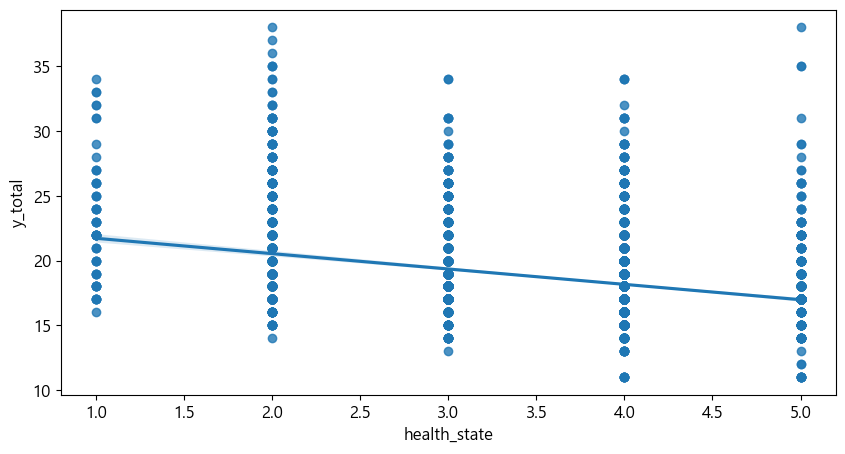

In [24]:
sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

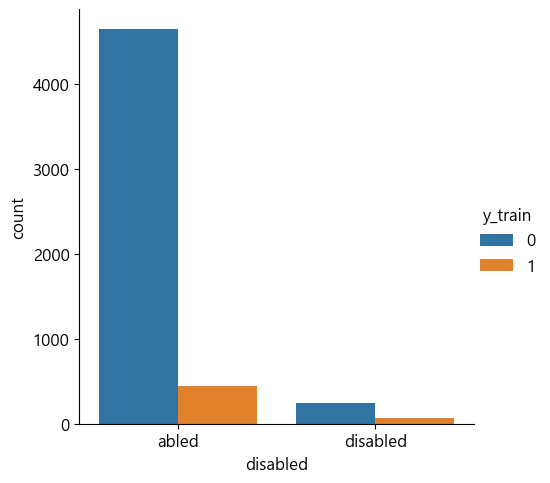

In [25]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [26]:
subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =319 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
abled       319
disabled    318
Name: count, dtype: int64

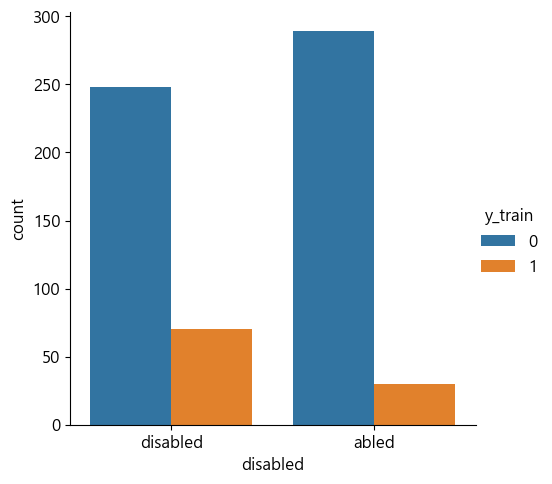

In [27]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [28]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

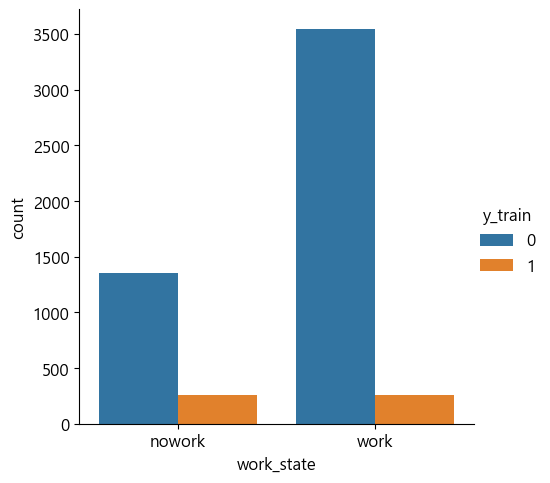

In [29]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

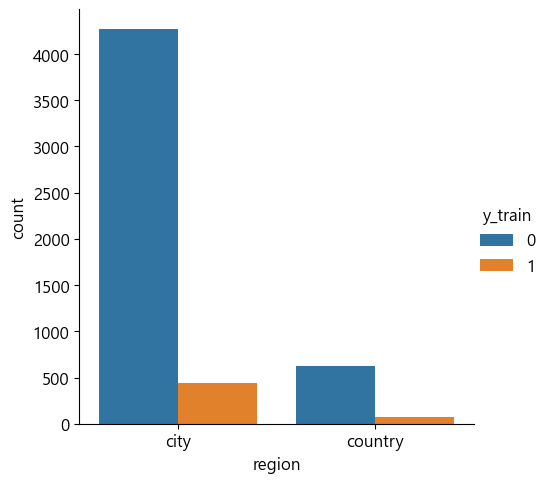

In [30]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [31]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =696 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    696
city       696
Name: count, dtype: int64

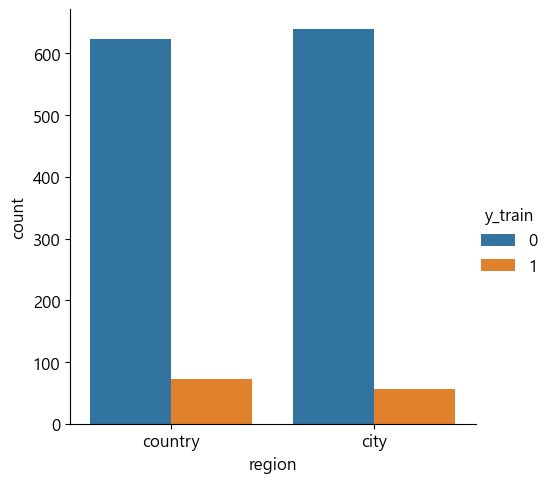

In [32]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

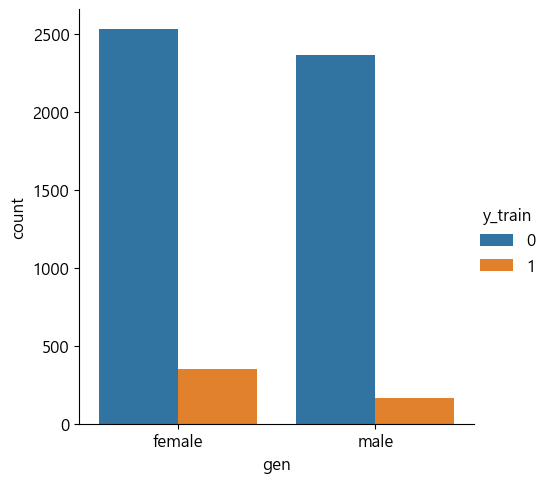

In [33]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [34]:
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,60세 이상
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,60세 이상
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,2290.8,21,1020.0,0,50~59세
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,2290.8,17,1020.0,0,30~39세
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,5958.0,20,12921.0,0,40~49세


In [35]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [36]:
df['age_range']= df['age_range'].astype('str')
df['age_range'].unique()

array(['60세 이상', '50~59세', '30~39세', '40~49세', '19~29세', 'nan'],
      dtype=object)

In [37]:
df['age_range'] = df['age_range'].fillna(0)
df = df.loc[df['age_range']!=0,:]


In [38]:
df.isnull().sum()

Unnamed: 0            0
gen                   0
age                   0
religion              0
edu                   0
sm_year            5031
sm_state              0
sm_day             4366
dr_mean_year          0
dr_6cup            2459
dr_hurt            2459
dr_worry           2459
preg_experience       0
health_state          0
disabled              0
work_state            0
work_code          1613
region                0
income                0
y_total               0
debt                  0
y_train               0
age_range             0
dtype: int64

In [39]:
from statsmodels.formula.api import logit

In [40]:
# pd.set_option("display.max_rows", None)

In [41]:
df['log_income'] = np.log1p(df['income'])
df['log_debt'] = np.log1p(df['debt'])


In [42]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range', 'log_income', 'log_debt'],
      dtype='object')

In [43]:
df=df.loc[:,['gen','edu','health_state','disabled','work_state','y_train','age_range','log_income','log_debt']]
df.head()

,gen,edu,health_state,disabled,work_state,y_train,age_range,log_income,log_debt
0,female,중졸,2,abled,nowork,0,60세 이상,6.006353,9.244838
2,male,대졸이상,4,abled,work,0,60세 이상,7.742836,9.962747
8,female,고졸,2,abled,work,0,50~59세,7.737093,6.928538
9,female,중졸,2,abled,nowork,0,30~39세,7.737093,6.928538
13,male,대졸이상,4,abled,work,0,40~49세,8.692658,9.466687


In [44]:
df['edu'].value_counts()

edu
대졸이상    2686
고졸      1690
초졸이하     607
중졸       431
Name: count, dtype: int64

In [45]:
df.loc[df['gen']=='male','gen']=1
df.loc[df['gen']=='female','gen']=2
df['gen'] = df['gen'].astype('category')

df.loc[df['edu']=='초졸이하','edu']=1
df.loc[df['edu']=='중졸','edu']=2
df.loc[df['edu']=='고졸','edu']=3
df.loc[df['edu']=='대졸이상','edu']=4
df['edu'] = df['edu'].astype('category')

df['health_state'] = df['health_state'].astype('category')

df.loc[df['disabled']=='disabled','disabled']=1
df.loc[df['disabled']=='abled','disabled']=2
df['work_state']= df['disabled'].astype('category')

df.loc[df['work_state']=='work','work_state']=1
df.loc[df['work_state']=='nowork','work_state']=2
df['work_state'] = df['work_state'].astype('category')







In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   category
 1   edu           5414 non-null   category
 2   health_state  5414 non-null   category
 3   disabled      5414 non-null   object  
 4   work_state    5414 non-null   category
 5   y_train       5414 non-null   int64   
 6   age_range     5414 non-null   object  
 7   log_income    5414 non-null   float64 
 8   log_debt      5414 non-null   float64 
dtypes: category(4), float64(2), int64(1), object(2)
memory usage: 275.6+ KB


In [47]:
df['age_range'] = df['age_range'].astype('str')
df.loc[df['age_range']=='19~29세','age_range']=1
df.loc[df['age_range']=='30~39세','age_range']=2
df.loc[df['age_range']=='40~49세','age_range']=3
df.loc[df['age_range']=='50~59세','age_range']=4
df.loc[df['age_range']=='60세 이상','age_range']=5
df['age_range'] = df['age_range'].astype('category')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   category
 1   edu           5414 non-null   category
 2   health_state  5414 non-null   category
 3   disabled      5414 non-null   object  
 4   work_state    5414 non-null   category
 5   y_train       5414 non-null   int64   
 6   age_range     5414 non-null   category
 7   log_income    5414 non-null   float64 
 8   log_debt      5414 non-null   float64 
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 238.8+ KB


In [49]:
df['age_range'].unique()

[5, 4, 2, 3, 1, 'nan']
Categories (6, object): [1, 2, 3, 4, 5, 'nan']

In [50]:
df['age_range']=df['age_range'].astype(str)
df= df.loc[df['age_range']!='nan',:]
df['age_range']=df['age_range'].astype("category")

In [51]:
df['age_range'].unique()

['5', '4', '2', '3', '1']
Categories (5, object): ['1', '2', '3', '4', '5']

In [52]:
df.columns

Index(['gen', 'edu', 'health_state', 'disabled', 'work_state', 'y_train',
       'age_range', 'log_income', 'log_debt'],
      dtype='object')

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
df = pd.get_dummies(df,drop_first=True,dtype='int')
df.head()

,y_train,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,0,7.742836,9.962747,0,0,0,1,0,0,1,0,1,1,0,0,0,1
8,0,7.737093,6.928538,1,0,1,0,1,0,0,0,1,1,0,0,1,0
9,0,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0
13,0,8.692658,9.466687,0,0,0,1,0,0,1,0,1,1,0,1,0,0


In [55]:
# df = df.drop(['age_range_nan'],axis=1)
# df.columns

In [56]:
df.head()

,y_train,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,0,7.742836,9.962747,0,0,0,1,0,0,1,0,1,1,0,0,0,1
8,0,7.737093,6.928538,1,0,1,0,1,0,0,0,1,1,0,0,1,0
9,0,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0
13,0,8.692658,9.466687,0,0,0,1,0,0,1,0,1,1,0,1,0,0


In [57]:
cnames = list(df.columns)
cnames = cnames[1:]
cnames

['log_income',
 'log_debt',
 'gen_2',
 'edu_2',
 'edu_3',
 'edu_4',
 'health_state_2',
 'health_state_3',
 'health_state_4',
 'health_state_5',
 'disabled_2',
 'work_state_2',
 'age_range_2',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [58]:
model = logit('y_train ~df[cnames]',data = df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.271255
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5389
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1366
Time:                        16:21:57   Log-Likelihood:                -1466.1
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 2.330e-89
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4321      0.660      6.712      0.000       3.138       5.726
df[cnames][0]    

In [59]:
cnames

['log_income',
 'log_debt',
 'gen_2',
 'edu_2',
 'edu_3',
 'edu_4',
 'health_state_2',
 'health_state_3',
 'health_state_4',
 'health_state_5',
 'disabled_2',
 'work_state_2',
 'age_range_2',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [60]:
# df[cnames][1] -> log_debt
# df[cnames][3]  -> edu_2
# df[cnames][4]  -> edu_3
# df[cnames][5] -> edu_4
# df[cnames][10]  -> disabled_2
# df[cnames][11]  -> work_state_2
# df[cnames][12]  -> age_range_2


In [61]:
# df.drop(['log_debt','edu_2','edu_3','edu_4','disabled_2','work_state_2','age_range_2'],axis=1,inplace=True)
# df.head()


In [62]:
# cnames2= list(df.columns)
# cnames2

In [63]:
df.head()

,y_train,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,0,7.742836,9.962747,0,0,0,1,0,0,1,0,1,1,0,0,0,1
8,0,7.737093,6.928538,1,0,1,0,1,0,0,0,1,1,0,0,1,0
9,0,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0
13,0,8.692658,9.466687,0,0,0,1,0,0,1,0,1,1,0,1,0,0


In [64]:
# model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5+age_range_3+age_range_4+age_range_5',data = df)
# fit2 = model2.fit()
# print(fit2.summary())

In [65]:
# model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5+age_range_3',data = df)
# fit2 = model2.fit()
# print(fit2.summary())

In [66]:
# model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5',data = df)
# fit2 = model2.fit()
# print(fit2.summary())

In [69]:
print(df.head())
x_train = df.drop(['y_train'], axis=1)
y_train = df[['y_train']]

    y_train  log_income  log_debt  gen_2  edu_2  edu_3  edu_4  health_state_2  \
0         0    6.006353  9.244838      1      1      0      0               1   
2         0    7.742836  9.962747      0      0      0      1               0   
8         0    7.737093  6.928538      1      0      1      0               1   
9         0    7.737093  6.928538      1      1      0      0               1   
13        0    8.692658  9.466687      0      0      0      1               0   

    health_state_3  health_state_4  health_state_5  disabled_2  work_state_2  \
0                0               0               0           1             1   
2                0               1               0           1             1   
8                0               0               0           1             1   
9                0               0               0           1             1   
13               0               1               0           1             1   

    age_range_2  age_range_3  ag

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


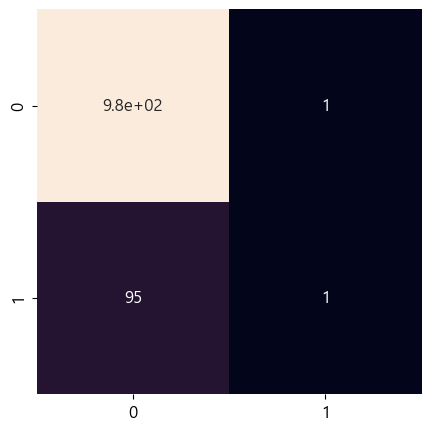

In [70]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

In [71]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred)) # 정밀도
print("Recall:%.4f" % recall_score(y_val, y_val_pred)) # 재현율
print("F1:%.4f" % f1_score(y_val, y_val_pred)) # 정확도와 재현율의 조화
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred)) # 데이콘 경진대회에서 사용하는 평가지표 1에가까울소록 좋은 모델링

Accuracy:0.9112
Precision:0.5000
Recall:0.0104
F1:0.0204
AUC:0.5047


In [72]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)

y_tr_pred = lr_model.predict(x_tr)
print("훈련 Accuracy:%.4f" % accuracy_score(y_tr, y_tr_pred))
print("훈련 ACU:%.4f" % roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(x_val)
print("검증 Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("검증 AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

훈련 Accuracy:0.9038
훈련 ACU:0.5109
검증 Accuracy:0.9112
검증 AUC:0.5047


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20)
from sklearn.model_selection import cross_val_score

auc_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a

개별 Fold의 AUC 점수 : [0.7317 0.7763 0.7271 0.7439 0.7434]
평균 AUC 점수: 0.7445


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status

In [74]:
def plot_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp = importances[indices]

    plt.figure(figsize=(10,12))
    plt.title("Feature impotance")
    plt.barh(range(len(indices)), feature_imp, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel("Relative Importance")

    print("피처:", list(reversed(feature_names)))
    print("중요도:", list(reversed(feature_imp)))

    return list(reversed(feature_names)), list(reversed(feature_imp))

In [75]:
rf_model.fit(x_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_16032\1995960165.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=20)

In [76]:
selected_features = list(x_train.columns)

피처: ['log_income', 'log_debt', 'health_state_2', 'gen_2', 'health_state_4', 'edu_3', 'age_range_5', 'age_range_4', 'edu_4', 'edu_2', 'health_state_3', 'age_range_3', 'age_range_2', 'work_state_2', 'disabled_2', 'health_state_5']
중요도: [0.4090207019527281, 0.36559072403329024, 0.03496780788091348, 0.028491457734360542, 0.019711884656664482, 0.017959150481601297, 0.017025968805454168, 0.016374204388327228, 0.01529535961089914, 0.01522564509266073, 0.014716988071236168, 0.011805433200720104, 0.009879580038800174, 0.008626236834735297, 0.008601426647115159, 0.006707430570493808]


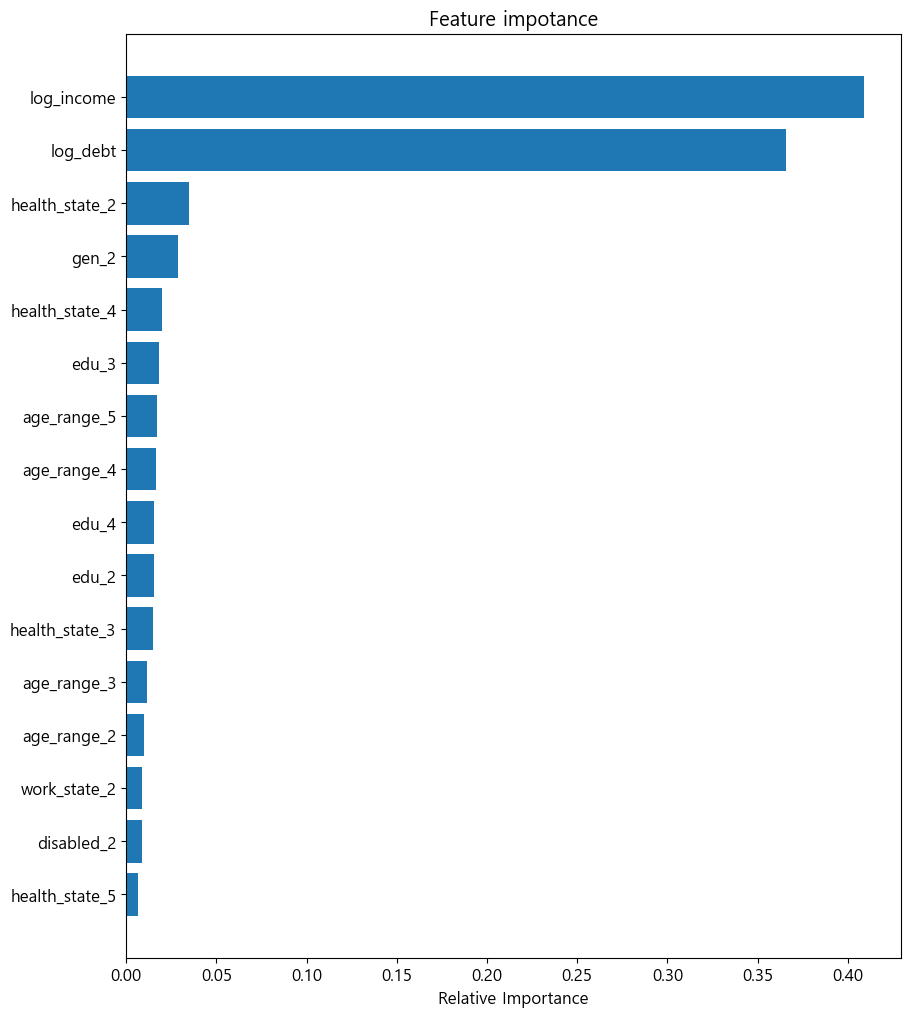

In [77]:
imp_features, imp_scores = plot_importance(rf_model, selected_features)

In [ ]:
# rf_model = RandomForestClassifier(random_state=2020)
# auc_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='roc_auc')
# print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
# print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

In [ ]:
# from xgboost import XGBClassifier
# xgb_model = XGBClassifier(max_depth=3, random_state=2020)
# auc_scores = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='roc_auc')
# print("개별 Fold의 AUC 점수:", np.round(auc_scores, 4))
# print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

In [ ]:
df = pd.read_excel("한국복지패널조사.xlsx")
df.head()

,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,...,wc17_64,wc17_65,wc17_5aq4,wc17_5aq5,wc17_5aq6,h17_pers_income1,h17_pers_income2,h17_pers_income3,h17_pers_income4,h17_pers_income5
0,2,1,1,20101,0,0,NaN,0.255099,0.255098,1301.779156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,3,1,1,30101,0,0,NaN,0.369345,0.369345,1884.782338,...,NaN,NaN,NaN,NaN,NaN,NaN,2064.0,NaN,0,NaN
2,4,1,1,40101,0,0,NaN,0.228046,0.228400,1163.730163,...,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,0,NaN
3,6,1,1,60101,0,0,NaN,0.524368,0.534658,2675.871234,...,1.0,.,1.0,3.0,4.0,3216.0,NaN,NaN,0,NaN
4,6,1,1,60101,0,0,NaN,0.851223,0.851223,4343.829280,...,4.0,.,1.0,4.0,3.0,NaN,1680.0,NaN,0,NaN


In [ ]:
ex_1 = df.copy()
ex_1

,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,...,wc17_64,wc17_65,wc17_5aq4,wc17_5aq5,wc17_5aq6,h17_pers_income1,h17_pers_income2,h17_pers_income3,h17_pers_income4,h17_pers_income5
0,2,1,1,20101,0,0,NaN,0.255099,0.255098,1301.779156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,3,1,1,30101,0,0,NaN,0.369345,0.369345,1884.782338,...,NaN,NaN,NaN,NaN,NaN,NaN,2064.0,NaN,0,NaN
2,4,1,1,40101,0,0,NaN,0.228046,0.228400,1163.730163,...,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,0,NaN
3,6,1,1,60101,0,0,NaN,0.524368,0.534658,2675.871234,...,1.0,.,1.0,3.0,4.0,3216.0,NaN,NaN,0,NaN
4,6,1,1,60101,0,0,NaN,0.851223,0.851223,4343.829280,...,4.0,.,1.0,4.0,3.0,NaN,1680.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,12010,17,1,120101701,2,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10350.0,NaN,NaN,0,NaN
16587,12010,17,1,120101701,2,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
16588,12010,17,1,120101701,2,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
16589,12011,17,1,120111701,2,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7200.0,NaN,680.0,0,NaN


In [ ]:
ex_2 = pd.read_excel("빚추가마지막.xlsx")
ex_2

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,13469,male,47,no,대졸이상,25.0,yes,10.0,주2~3회,주1회,...,남성,4,abled,work,151.0,city,8548.0,17,26014.0,0
13470,13470,female,46,no,대졸이상,NaN,no,NaN,주2~3회,연1회,...,없다,4,abled,nowork,NaN,city,8548.0,17,26014.0,0
13471,13471,male,48,no,대졸이상,25.0,yes,7.0,전혀마시지않음,NaN,...,남성,4,abled,work,222.0,city,8452.0,17,12360.0,0
13472,13472,male,59,yes,대졸이상,32.0,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,248.0,city,7094.0,18,1902.0,0


In [ ]:
y_train = ex_2['y_train']
y_train

0        0
1        1
2        0
3        0
4        0
        ..
13469    0
13470    0
13471    0
13472    0
13473    0
Name: y_train, Length: 13474, dtype: int64

In [ ]:
ex_1 = ex_1[['h17_med3', 'h17_med4', 'h17_med5', 'h17_eco4', 'h1706_1', 'h1706_6', 'h1707_4',
            'h1707_9', 'h1712_2_11aq1', 'h1713_2','h1713_6', 'h1713_10', 'h1717_1', 'h1717_3',
            'h1717_4', 'h1717_5', 'h1717_6', 'h1717_7']]
ex_1.head()

,h17_med3,h17_med4,h17_med5,h17_eco4,h1706_1,h1706_6,h1707_4,h1707_9,h1712_2_11aq1,h1713_2,h1713_6,h1713_10,h1717_1,h1717_3,h1717_4,h1717_5,h1717_6,h1717_7
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,1,2,1,2,2,4,2,2
1,122,0,0.0,2.0,2,500.0,2.0,239,2.0,1,1,2,0,3,2,2,2,1
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,1,2,1,2,1,3,2,2
3,6,0,0.0,1.0,2,70000.0,19.0,541,2.0,1,2,2,0,3,1,2,2,2
4,8,0,0.0,2.0,2,70000.0,19.0,541,2.0,1,2,2,0,3,1,2,2,2


In [ ]:
ex_1.columns = ['med1', 'med2', 'med3', 'eco1', 'home1', 'home2', 'tax', 'life',
                'basic', 'life_apply', 'med_apply', 'item_apply',
                'family1', 'family2', 'family3', 'family4', 'family5', 'family6'
                ]
ex_1.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,med_apply,item_apply,family1,family2,family3,family4,family5,family6
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,1,2,1,2,2,4,2,2
1,122,0,0.0,2.0,2,500.0,2.0,239,2.0,1,1,2,0,3,2,2,2,1
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,1,2,1,2,1,3,2,2
3,6,0,0.0,1.0,2,70000.0,19.0,541,2.0,1,2,2,0,3,1,2,2,2
4,8,0,0.0,2.0,2,70000.0,19.0,541,2.0,1,2,2,0,3,1,2,2,2


In [ ]:
ex_1.isnull().sum()
ex_1 = ex_1.dropna()

In [ ]:
ex_1.isnull().sum()

med1          0
med2          0
med3          0
eco1          0
home1         0
home2         0
tax           0
life          0
basic         0
life_apply    0
med_apply     0
item_apply    0
family1       0
family2       0
family3       0
family4       0
family5       0
family6       0
dtype: int64

In [ ]:
ex_1['y_train'] = y_train
ex_1.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,med_apply,item_apply,family1,family2,family3,family4,family5,family6,y_train
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,1,2,1,2,2,4,2,2,0.0
1,122,0,0.0,2.0,2,500.0,2.0,239,2.0,1,1,2,0,3,2,2,2,1,1.0
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,1,2,1,2,1,3,2,2,0.0
3,6,0,0.0,1.0,2,70000.0,19.0,541,2.0,1,2,2,0,3,1,2,2,2,0.0
4,8,0,0.0,2.0,2,70000.0,19.0,541,2.0,1,2,2,0,3,1,2,2,2,0.0


In [ ]:
# h17_med3 외래진료횟수
# h17_med4 입원횟수
# h17_med5 입원일수
# h17_eco4 주된 경제활동
# h1706_1 주택유형
# h1706_6 집의가격
# h1707_4 세금(만원, 소수첫째자리까지)
# h1707_9 총생활비(만원)
# h1712_2_11aq1 기초생활수급 신청여부
# h1713_2 생계비 지원 경험 여부
# h1713_6 의료비 지원 경험 여부 
# h1713_10 물품지원 경험여부
# h1717_1 1년간 근심이나 갈등을 초래한 문제(1순위)
# h1717_3 가족원간 의견충돌이 잦은 경우
# h1717_4 가족원간 화가나서 물건을 집어 던지는 경우
# h1717_5 가족원간 침참하게 문제를 논의하는 경우
# h1717_6 가족원간 자주 서로 비난하는 경우
# h1717_7 가족원간 가끔 때리는 경우
ex_2.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train'],
      dtype='object')

In [ ]:
y_train = ex_2['y_train']
y_train1 = ex_2['gen']
y_train2 = ex_2['age']
y_train3 = ex_2['religion']
y_train4 = ex_2['edu']
y_train5 = ex_2['health_state']
y_train6 = ex_2['disabled']
y_train7 = ex_2['work_state']
y_train8 = ex_2['work_code']
y_train9 = ex_2['income']
y_train10 = ex_2['y_total']
y_train11 = ex_2['debt']

ex_1['y_train'] = y_train
ex_1['gen'] = y_train1
ex_1['age'] = y_train2
ex_1['religion'] = y_train3
ex_1['edu'] = y_train4
ex_1['health_state'] = y_train5
ex_1['disabled'] = y_train6
ex_1['work_state'] = y_train7
ex_1['work_code'] = y_train8
ex_1['income'] = y_train9
ex_1['y_total'] = y_train10
ex_1['debt'] = y_train11
ex_1.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,...,age,religion,edu,health_state,disabled,work_state,work_code,income,y_total,debt
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,...,78.0,yes,중졸,2.0,abled,nowork,NaN,405.0,20.0,10350.0
1,122,0,0.0,2.0,2,500.0,2.0,239,2.0,1,...,75.0,no,초졸이하,1.0,abled,work,942.0,2788.0,29.0,0.0
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,...,81.0,yes,대졸이상,4.0,abled,work,762.0,2304.0,18.0,21220.0
3,6,0,0.0,1.0,2,70000.0,19.0,541,2.0,1,...,61.0,yes,대졸이상,4.0,abled,work,855.0,5231.0,20.0,0.0
4,8,0,0.0,2.0,2,70000.0,19.0,541,2.0,1,...,60.0,yes,고졸,4.0,abled,work,399.0,5231.0,21.0,0.0


In [ ]:
df = ex_1.loc[(ex_1['income']>0)&(ex_1['debt']>0),:]
df

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,...,age,religion,edu,health_state,disabled,work_state,work_code,income,y_total,debt
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,...,78.0,yes,중졸,2.0,abled,nowork,NaN,405.0,20.0,10350.0
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,...,81.0,yes,대졸이상,4.0,abled,work,762.0,2304.0,18.0,21220.0
9,48,0,0.0,6.0,4,6000.0,0.1,182,2.0,2,...,31.0,no,중졸,2.0,abled,nowork,NaN,2290.8,17.0,1020.0
13,3,0,0.0,9.0,2,1400.0,0.0,54,2.0,2,...,45.0,no,대졸이상,4.0,abled,work,399.0,5958.0,20.0,12921.0
14,11,0,0.0,2.0,3,21000.0,3.0,556,2.0,2,...,48.0,no,대졸이상,4.0,abled,work,254.0,5958.0,23.0,12921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,16,0,0.0,2.0,7,30000.0,11.0,433,2.0,2,...,47.0,no,대졸이상,4.0,abled,work,151.0,8548.0,17.0,26014.0
13470,2,0,0.0,2.0,7,30000.0,11.0,433,2.0,2,...,46.0,no,대졸이상,4.0,abled,nowork,NaN,8548.0,17.0,26014.0
13471,16,0,0.0,6.0,3,8000.0,6.0,293,2.0,2,...,48.0,no,대졸이상,4.0,abled,work,222.0,8452.0,17.0,12360.0
13472,16,0,0.0,7.0,3,8000.0,6.0,293,2.0,2,...,59.0,yes,대졸이상,4.0,abled,work,248.0,7094.0,18.0,1902.0


In [ ]:
df.isnull().sum()

med1               0
med2               0
med3               0
eco1               0
home1              0
home2              0
tax                0
life               0
basic              0
life_apply         0
med_apply          0
item_apply         0
family1            0
family2            0
family3            0
family4            0
family5            0
family6            0
y_train            0
gen                0
age                0
religion           0
edu                0
health_state       0
disabled           0
work_state         0
work_code       1296
income             0
y_total            0
debt               0
dtype: int64

In [ ]:
df = df.drop(['work_code'], axis=1)
df.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,...,gen,age,religion,edu,health_state,disabled,work_state,income,y_total,debt
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,...,female,78.0,yes,중졸,2.0,abled,nowork,405.0,20.0,10350.0
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,...,male,81.0,yes,대졸이상,4.0,abled,work,2304.0,18.0,21220.0
9,48,0,0.0,6.0,4,6000.0,0.1,182,2.0,2,...,female,31.0,no,중졸,2.0,abled,nowork,2290.8,17.0,1020.0
13,3,0,0.0,9.0,2,1400.0,0.0,54,2.0,2,...,male,45.0,no,대졸이상,4.0,abled,work,5958.0,20.0,12921.0
14,11,0,0.0,2.0,3,21000.0,3.0,556,2.0,2,...,female,48.0,no,대졸이상,4.0,abled,work,5958.0,23.0,12921.0


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
df.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,med_apply,item_apply,family1,family2,family3,family4,family5,family6,y_train,gen,age,religion,edu,health_state,disabled,work_state,income,y_total,debt,age_range
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,1,2,1,2,2,4,2,2,0.0,female,78.0,yes,중졸,2.0,abled,nowork,405.0,20.0,10350.0,60세 이상
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,1,2,1,2,1,3,2,2,0.0,male,81.0,yes,대졸이상,4.0,abled,work,2304.0,18.0,21220.0,60세 이상
9,48,0,0.0,6.0,4,6000.0,0.1,182,2.0,2,1,1,4,1,1,3,1,1,0.0,female,31.0,no,중졸,2.0,abled,nowork,2290.8,17.0,1020.0,30~39세
13,3,0,0.0,9.0,2,1400.0,0.0,54,2.0,2,2,2,1,0,0,0,0,0,0.0,male,45.0,no,대졸이상,4.0,abled,work,5958.0,20.0,12921.0,40~49세
14,11,0,0.0,2.0,3,21000.0,3.0,556,2.0,2,2,2,3,4,2,5,4,2,1.0,female,48.0,no,대졸이상,4.0,abled,work,5958.0,23.0,12921.0,40~49세


In [ ]:
df = df.drop(['age'], axis=1)
df.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,med_apply,item_apply,family1,family2,family3,family4,family5,family6,y_train,gen,religion,edu,health_state,disabled,work_state,income,y_total,debt,age_range
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,1,2,1,2,2,4,2,2,0.0,female,yes,중졸,2.0,abled,nowork,405.0,20.0,10350.0,60세 이상
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,1,2,1,2,1,3,2,2,0.0,male,yes,대졸이상,4.0,abled,work,2304.0,18.0,21220.0,60세 이상
9,48,0,0.0,6.0,4,6000.0,0.1,182,2.0,2,1,1,4,1,1,3,1,1,0.0,female,no,중졸,2.0,abled,nowork,2290.8,17.0,1020.0,30~39세
13,3,0,0.0,9.0,2,1400.0,0.0,54,2.0,2,2,2,1,0,0,0,0,0,0.0,male,no,대졸이상,4.0,abled,work,5958.0,20.0,12921.0,40~49세
14,11,0,0.0,2.0,3,21000.0,3.0,556,2.0,2,2,2,3,4,2,5,4,2,1.0,female,no,대졸이상,4.0,abled,work,5958.0,23.0,12921.0,40~49세


In [ ]:
df.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,med_apply,item_apply,family1,family2,family3,family4,family5,family6,y_train,gen,religion,edu,health_state,disabled,work_state,income,y_total,debt,age_range
0,22,1,1.0,9.0,2,100000.0,11.0,275,2.0,2,1,2,1,2,2,4,2,2,0.0,female,yes,중졸,2.0,abled,nowork,405.0,20.0,10350.0,60세 이상
2,325,0,0.0,3.0,1,40000.0,11.0,156,2.0,1,1,2,1,2,1,3,2,2,0.0,male,yes,대졸이상,4.0,abled,work,2304.0,18.0,21220.0,60세 이상
9,48,0,0.0,6.0,4,6000.0,0.1,182,2.0,2,1,1,4,1,1,3,1,1,0.0,female,no,중졸,2.0,abled,nowork,2290.8,17.0,1020.0,30~39세
13,3,0,0.0,9.0,2,1400.0,0.0,54,2.0,2,2,2,1,0,0,0,0,0,0.0,male,no,대졸이상,4.0,abled,work,5958.0,20.0,12921.0,40~49세
14,11,0,0.0,2.0,3,21000.0,3.0,556,2.0,2,2,2,3,4,2,5,4,2,1.0,female,no,대졸이상,4.0,abled,work,5958.0,23.0,12921.0,40~49세


In [ ]:
df['income'] = np.log1p(df['income'])
df['debt'] = np.log1p(df['debt'])
df['home2'] = np.log1p(df['home2'])
df['home2'] = np.log1p(df['home2'])
df['life'] = np.log1p(df['life'])

In [ ]:
df.loc[df['gen']=='male','gen']=1
df.loc[df['gen']=='female','gen']=2
df['gen'] = df['gen'].astype('category')

df.loc[df['edu']=='초졸이하','edu']=1
df.loc[df['edu']=='중졸','edu']=2
df.loc[df['edu']=='고졸','edu']=3
df.loc[df['edu']=='대졸이상','edu']=4
df['edu'] = df['edu'].astype('category')

df['health_state'] = df['health_state'].astype('category')

df.loc[df['disabled']=='disabled','disabled']=1
df.loc[df['disabled']=='abled','disabled']=2
df['work_state']= df['disabled'].astype('category')

df.loc[df['work_state']=='work','work_state']=1
df.loc[df['work_state']=='nowork','work_state']=2
df['work_state'] = df['work_state'].astype('category')

df['age_range'] = df['age_range'].astype('str')
df.loc[df['age_range']=='19~29세','age_range']=1
df.loc[df['age_range']=='30~39세','age_range']=2
df.loc[df['age_range']=='40~49세','age_range']=3
df.loc[df['age_range']=='50~59세','age_range']=4
df.loc[df['age_range']=='60세 이상','age_range']=5
df['age_range'] = df['age_range'].astype('category')


In [ ]:
df.head()

,med1,med2,med3,eco1,home1,home2,tax,life,basic,life_apply,med_apply,item_apply,family1,family2,family3,family4,family5,family6,y_train,gen,religion,edu,health_state,disabled,work_state,income,y_total,debt,age_range
0,22,1,1.0,9.0,2,2.526763,11.0,5.620401,2.0,2,1,2,1,2,2,4,2,2,0.0,2,yes,2,2.0,2,2,6.006353,20.0,9.244838,5
2,325,0,0.0,3.0,1,2.450717,11.0,5.056246,2.0,1,1,2,1,2,1,3,2,2,0.0,1,yes,4,4.0,2,2,7.742836,18.0,9.962747,5
9,48,0,0.0,6.0,4,2.272093,0.1,5.209486,2.0,2,1,1,4,1,1,3,1,1,0.0,2,no,2,2.0,2,2,7.737093,17.0,6.928538,2
13,3,0,0.0,9.0,2,2.109600,0.0,4.007333,2.0,2,2,2,1,0,0,0,0,0,0.0,1,no,4,4.0,2,2,8.692658,20.0,9.466687,3
14,11,0,0.0,2.0,3,2.393552,3.0,6.322565,2.0,2,2,2,3,4,2,5,4,2,1.0,2,no,4,4.0,2,2,8.692658,23.0,9.466687,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4321 entries, 0 to 13473
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   med1              4321 non-null   int64  
 1   med2              4321 non-null   int64  
 2   med3              4321 non-null   float64
 3   eco1              4321 non-null   float64
 4   home1             4321 non-null   int64  
 5   home2             4321 non-null   float64
 6   tax               4321 non-null   float64
 7   life              4321 non-null   float64
 8   basic             4321 non-null   float64
 9   life_apply        4321 non-null   int64  
 10  med_apply         4321 non-null   int64  
 11  item_apply        4321 non-null   int64  
 12  family1           4321 non-null   int64  
 13  family2           4321 non-null   int64  
 14  family3           4321 non-null   int64  
 15  family4           4321 non-null   int64  
 16  family5           4321 non-null   int64  
 17 

In [ ]:
df = pd.get_dummies(df,drop_first=True,dtype='int')
df.head()
a = list(df.columns)
# print(a)
# print(a[18])
# print(a[20])
# a1 = a[:18] 
# b1 = a[19:]
a.remove("y_train")
a.remove("y_total")
print(a)

['med1', 'med2', 'med3', 'eco1', 'home1', 'home2', 'tax', 'life', 'basic', 'life_apply', 'med_apply', 'item_apply', 'family1', 'family2', 'family3', 'family4', 'family5', 'family6', 'income', 'debt', 'gen_2', 'religion_yes', 'edu_2', 'edu_3', 'edu_4', 'health_state_2.0', 'health_state_3.0', 'health_state_4.0', 'health_state_5.0', 'disabled_2', 'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5', 'age_range_nan']


In [ ]:
# import statsmodels.api as sm
# model = sm.OLS(
#     df['y_train'],df[['med1', 'med2', 'med3', 'eco1', 'home1', 'home2', 'tax', 'life', 'basic', 'life_apply', 'med_apply', 'item_apply', 'family1', 'family2', 'family3', 'family4', 'family5', 'family6', 'y_train', 'income', 'y_total', 'debt', 'gen_2', 'religion_yes', 'edu_2', 'edu_3', 'edu_4', 'health_state_2.0', 'health_state_3.0', 'health_state_4.0', 'health_state_5.0', 'disabled_2', 'work_state_2', 'age_range_30~39세', 'age_range_40~49세', 'age_range_50~59세', 'age_range_60세 이상']])
# result = model.fit()
# tbl = result.summary()
# tbl

In [ ]:
# model2 = logit('y_train ~ med1+med2+med3+eco1+home1+home2+tax+life+basic+life_apply+med_apply+item_apply+family1+family2+family3+family4+family5+family6+income+debt+gen_2+religion_yes+edu_2+edu_3+edu_4+health_state_2.0+health_state_3.0+health_state_4.0+health_state_5.0+disabled_2+work_state_2+age_range_30~39세+age_range_40~49세+age_range_50~59세+age_range_60세 이상', data = df)
# fit2 = model2.fit()
# print(fit2.summary())

In [ ]:
df.isnull().sum()

med1                0
med2                0
med3                0
eco1                0
home1               0
home2               0
tax                 0
life                0
basic               0
life_apply          0
med_apply           0
item_apply          0
family1             0
family2             0
family3             0
family4             0
family5             0
family6             0
y_train             0
income              0
y_total             0
debt                0
gen_2               0
religion_yes        0
edu_2               0
edu_3               0
edu_4               0
health_state_2.0    0
health_state_3.0    0
health_state_4.0    0
health_state_5.0    0
disabled_2          0
work_state_2        0
age_range_2         0
age_range_3         0
age_range_4         0
age_range_5         0
age_range_nan       0
dtype: int64

In [ ]:
model = logit('y_train ~df[a]',data = df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.270170
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 4321
Model:                          Logit   Df Residuals:                     4285
Method:                           MLE   Df Model:                           35
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1555
Time:                        14:32:37   Log-Likelihood:                -1167.4
converged:                       True   LL-Null:                       -1382.4
Covariance Type:            nonrobust   LLR p-value:                 1.702e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2424      1.363      2.379      0.017       0.571       5.914
df[a][0]       0.0047      0.

In [ ]:
a.remove("y_train")
a.remove("y_total")
print(a)

In [ ]:
model = logit('y_total ~df[a]',data = df)
fit = model.fit()
print(fit.summary())

ValueError: endog must be in the unit interval.